# __Welcome to the Engineering Challenge!__

This notebook provides you some code to setup a Data Engineering problem. There is no optimal solution, but many good answers. We only want to see if you know how to tackle the problem. There is a lot of room for your approach to the problem. 

Goal: We want you to predict the number of __sales_per_day__ (= label) with the given dataset and put it into production.


Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

In [1]:
import pandas as pd 

data_path = 'data.csv' # maybe you have to modify this... 
data = pd.read_csv(data_path, sep=';')
print(data.head())

        brand  country currency  customers_per_day  outlet_id  week_id  \
0  MediaMarkt    spain     EURO             3138.0      100.0     34.0   
1      Saturn  germany     EURO              378.0       86.0      8.0   
2  MediaMarkt    italy     EURO              379.0      530.0     28.0   
3      Saturn  germany     EURO             3050.0       17.0     47.0   
4  MediaMarkt    spain     EURO              548.0      164.0      7.0   

  weekday  sales_per_day  
0     sat       72169.14  
1     mon       52825.62  
2     thu       53309.83  
3     sat       74237.45  
4     tue       56621.61  


<AxesSubplot:xlabel='week_id'>

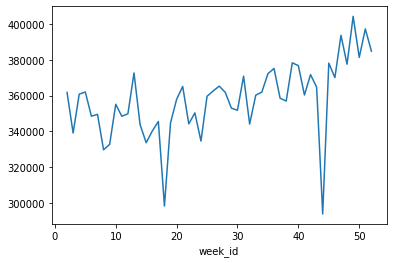

In [2]:
# Quick look to sales per week on a random outlet
data[(data.outlet_id == 222.0) & (data.currency == 'EURO') & (data.sales_per_day > 0)].groupby('week_id').sales_per_day.sum().plot()

In [3]:
pd.__version__

'1.2.2'

# Challenge
Now it is your turn. Show us how you are tackeling this problem. You have complete freedom what you do.

## Exploration
The goal here is to better understand the underlying data e.g. in terms of completeness, distribution etc..

In [4]:
# Understand schema and types
data.info()
print('\nColumns:')
print('-------------')
print('\n'.join(data.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18174 non-null  object 
 1   country            18185 non-null  object 
 2   currency           18184 non-null  object 
 3   customers_per_day  18199 non-null  float64
 4   outlet_id          18194 non-null  float64
 5   week_id            18194 non-null  float64
 6   weekday            18170 non-null  object 
 7   sales_per_day      18193 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.1+ MB

Columns:
-------------
brand
country
currency
customers_per_day
outlet_id
week_id
weekday
sales_per_day


In [5]:
# Analysis Step 1: I want to have a clean and relevant dataset, first data exploration

print("\nweekday unique values?")
print(data.weekday.unique())
print("\ncurrency unique values?")
print(data.currency.unique())
print("\nweekday has null values?")
print(data.weekday.isna().any())
print("\nweek_id has null values?")
print(data.week_id.isna().any())
print("\nweek_id minimum")
print(data.week_id.min())
print("\nweek_id maximum")
print(data.week_id.max())
print("\ncustomers_per_day min")
print(data.customers_per_day.min())
print("\ncustomers_per_day max")
print(data.customers_per_day.max())
print("\noutlet_id")
print(data.outlet_id.unique())


weekday unique values?
['sat' 'mon' 'thu' 'tue' 'fri' 'wed' 'sun' nan]

currency unique values?
['EURO' 'CHF' nan]

weekday has null values?
True

week_id has null values?
True

week_id minimum
-999999.0

week_id maximum
52.0

customers_per_day min
-999999.0

customers_per_day max
4734.0

outlet_id
[ 1.00000e+02  8.60000e+01  5.30000e+02  1.70000e+01  1.64000e+02
  3.99000e+02  5.98000e+02  3.42000e+02  5.60000e+01  4.77000e+02
  6.01000e+02  5.55000e+02  5.09000e+02  5.88000e+02  9.90000e+01
  1.87000e+02  9.50000e+01  3.33000e+02  1.40000e+01  1.08000e+02
  3.34000e+02  6.98000e+02  5.90000e+01  3.01000e+02  8.10000e+01
  6.94000e+02  5.20000e+01  1.42000e+02  1.12000e+02  3.39000e+02
  5.82000e+02  5.51000e+02  7.90000e+01  7.40000e+01  3.63000e+02
  6.08000e+02  2.34000e+02  4.08000e+02  7.00000e+01  2.55000e+02
  2.40000e+02  2.51000e+02  2.98000e+02  6.52000e+02  2.22000e+02
  5.10000e+01  4.21000e+02  1.06000e+02  6.45000e+02  9.70000e+01
 -9.99999e+05          nan]


In [6]:
# Action 1: Inform upstream data-ingestion teams that data is coming with null/invalid date values
# It is a good practice to communicate involved process owners and sources (if not self)

In [7]:
# Analysis Step 2: Create 'appropriate' data pipeline reading process (should use this one from now on)

In [8]:
# MODIFICATIONS:
# - Convert weekday into a number and merge bad values as -1
# - Convert week_id into an int and merge bad values as -1 
# - Enrich with calculated t column for time-series analysis
# - Enrich sales with normalized currency value (EUR 1-to-1 Default)


#########################################
#### Settings - Dummy, should be properly parametrized in a job setting/service
#########################################
WEEKDAY_REF = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
    'sat': 5,
    'sun': 6
}

CURRENCY_CONVERSION = { # Simplified, perhaps could check conversion rate at given date
    'EURO': 1.0,
    'CHF': 1.2
}

###############################################
### Ingestion Filter-Cleanuo Functions (Fast)
###############################################

def index_weekday(w):
    return WEEKDAY_REF[w] if w in WEEKDAY_REF else None

def keep_numerical_week_ids(w):
    return int(float(w)) if w.replace('.','',1).isdigit() else None

def clean_customers_per_day(c):
    return int(float(c)) if c.replace('.','',1).isdigit() and int(float(c)) >= 0 else None

def clean_outlet_id(o):
    return int(float(o)) if o.replace('.','',1).isdigit() and int(float(o)) >= 0 else None

################################
### READ INPUT CSV
################################
timed_data = pd.read_csv(
    data_path,
    sep=';',
    converters={ # Alternatives: Less "Aggressive" cleanup can be considered, by interpolation or finding missing days
        'weekday': index_weekday,
        'week_id': keep_numerical_week_ids,
        'customers_per_day': clean_customers_per_day,
        'outlet_id': clean_outlet_id
    }
)

#################################
### ENRICHMENT Functions
#################################

def define_t(row):
    week_id, weekday = row['week_id'], row['weekday']
    return ((week_id * 7) - 7 + weekday)

def normalize_sales(row):
    currency = row['currency']
    sales = row['sales_per_day']
    sales = sales if sales and sales >= 0 else None
    return (sales * CURRENCY_CONVERSION[currency]) if currency in CURRENCY_CONVERSION and sales else sales # Assume EURO (Decision)
    
####################################
######## Apply Enrichment Functions
####################################
timed_data['t'] = timed_data[(timed_data.week_id > 0) & (timed_data.weekday > 0)].apply(define_t, axis=1)
timed_data['sales_z'] = timed_data.apply(normalize_sales, axis=1)
timed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18174 non-null  object 
 1   country            18185 non-null  object 
 2   currency           18184 non-null  object 
 3   customers_per_day  18186 non-null  float64
 4   outlet_id          18183 non-null  float64
 5   week_id            18178 non-null  float64
 6   weekday            18170 non-null  float64
 7   sales_per_day      18193 non-null  float64
 8   t                  15549 non-null  float64
 9   sales_z            15590 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.4+ MB


In [9]:
# Analysis Step 1-b Post Check: Feature Engineering based on taken decisions

print("\nweekday unique values?")
print(timed_data.weekday.unique())
print("\nweekday has null values?")
print(timed_data.weekday.isna().any())
print("\nweek_id has null values?")
print(timed_data.week_id.isna().any())
print("\nweek_id minimum")
print(timed_data.week_id.min())
print("\nweek_id maximum")
print(timed_data.week_id.max())
print("\ncustomers_per_day min")
print(timed_data.customers_per_day.min())
print("\ncustomers_per_day max")
print(timed_data.customers_per_day.max())
print("\nsales_z min")
print(timed_data.sales_z.min())
print("\nsales_z max")
print(timed_data.sales_z.max())
print("\noutlet_id")
print(sorted(timed_data.outlet_id.unique()))


weekday unique values?
[ 5.  0.  3.  1.  4.  2.  6. nan]

weekday has null values?
True

week_id has null values?
True

week_id minimum
1.0

week_id maximum
52.0

customers_per_day min
0.0

customers_per_day max
4734.0

sales_z min
36364.44

sales_z max
109142.46

outlet_id
[14.0, 17.0, 51.0, 52.0, 56.0, 59.0, 70.0, 74.0, 79.0, 81.0, 86.0, 95.0, 97.0, 99.0, 100.0, 106.0, 108.0, 112.0, 142.0, 164.0, 187.0, 222.0, 234.0, 240.0, 251.0, 255.0, 298.0, 301.0, 333.0, 334.0, 339.0, 342.0, 363.0, 399.0, 408.0, 421.0, 477.0, 509.0, 530.0, 551.0, 555.0, 582.0, 588.0, 598.0, 601.0, 608.0, 645.0, 652.0, 694.0, 698.0, nan]


In [10]:
timed_data.sort_values(by=['t'])

brand      country currency  customers_per_day  outlet_id  \
5286   MediaMarkt      germany     EURO                0.0       59.0   
12257      Saturn        italy     EURO                0.0      588.0   
12725      Saturn        italy     EURO                0.0      582.0   
1075   MediaMarkt        italy     EURO                0.0      555.0   
11141  MediaMarkt      germany     EURO                0.0       95.0   
...           ...          ...      ...                ...        ...   
18179  MediaMarkt  netherlands     EURO              349.0      694.0   
18184  MediaMarkt  netherlands     EURO              325.0      652.0   
18187  MediaMarkt  netherlands     EURO              219.0      694.0   
18204  MediaMarkt      germany     EURO              230.0       99.0   
18205  MediaMarkt      germany     EURO              403.0       99.0   

       week_id  weekday  sales_per_day    t   sales_z  
5286       1.0      6.0           0.00  6.0       NaN  
12257      1.0      6.0           0.00  6.0       NaN  
12725      1.0      6.0           0.00  6.0       NaN  
1075       1.0      6.0           0.00  6.0       NaN  
11141      1.0      6.0           0.00  6.0       NaN  
...        ...      ...            ...  ...       ...  
18179     52.0      0.0       55506.73  NaN  55506.73  
18184     33.0      0.0       53468.91  NaN  53468.91  
18187     15.0      0.0       54722.83  NaN  54722.83  
18204     29.0      0.0       54474.81  NaN  54474.81  
18205     50.0      0.0       56045.90  NaN  56045.90  

[18207 rows x 10 columns]

In [11]:
# Analysis Step 3: Explore total daily sales (approximation)

aggregated_sales = timed_data.groupby(by=['t']).sum()
aggregated_sales[['customers_per_day', 'sales_z']]

customers_per_day      sales_z
t                                    
6.0                  0.0        0.000
8.0              22508.0  2723373.360
9.0              62059.0  3094189.394
10.0             23507.0  2951235.754
11.0             89555.0  2843825.516
...                  ...          ...
358.0            35040.0  2844477.692
359.0            92588.0  3461974.676
360.0            33801.0  3083149.836
361.0           135245.0  3315301.498
362.0           167318.0  3991234.714

[306 rows x 2 columns]

<AxesSubplot:xlabel='t'>

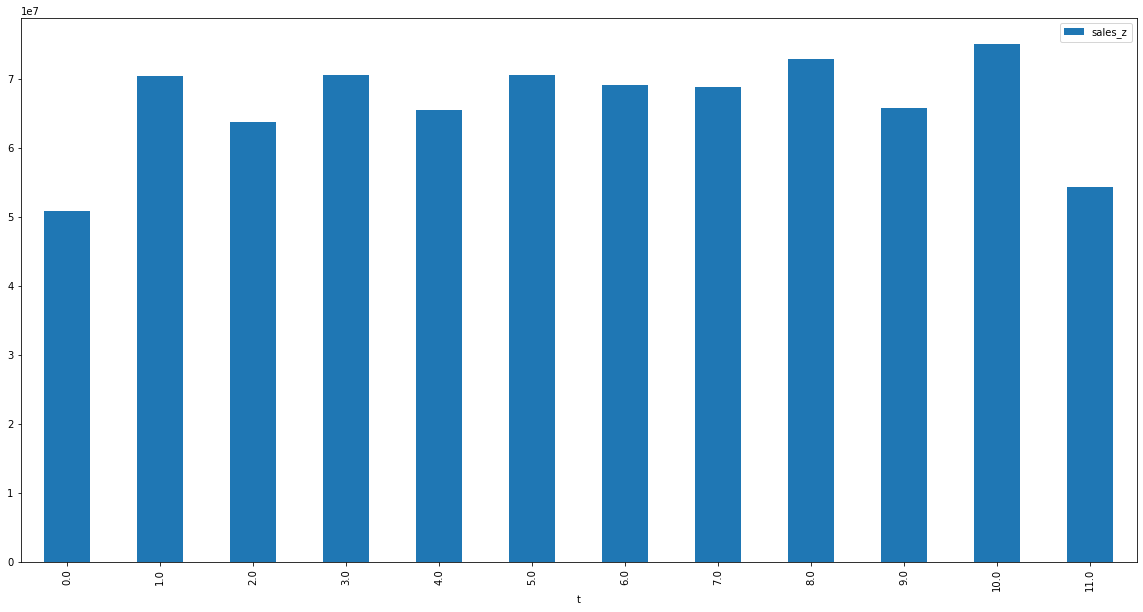

In [12]:
aggregated_sales.sales_z.groupby(aggregated_sales.index // 31).sum().plot(kind='bar', figsize=(20,10), legend=True)

<AxesSubplot:xlabel='t'>

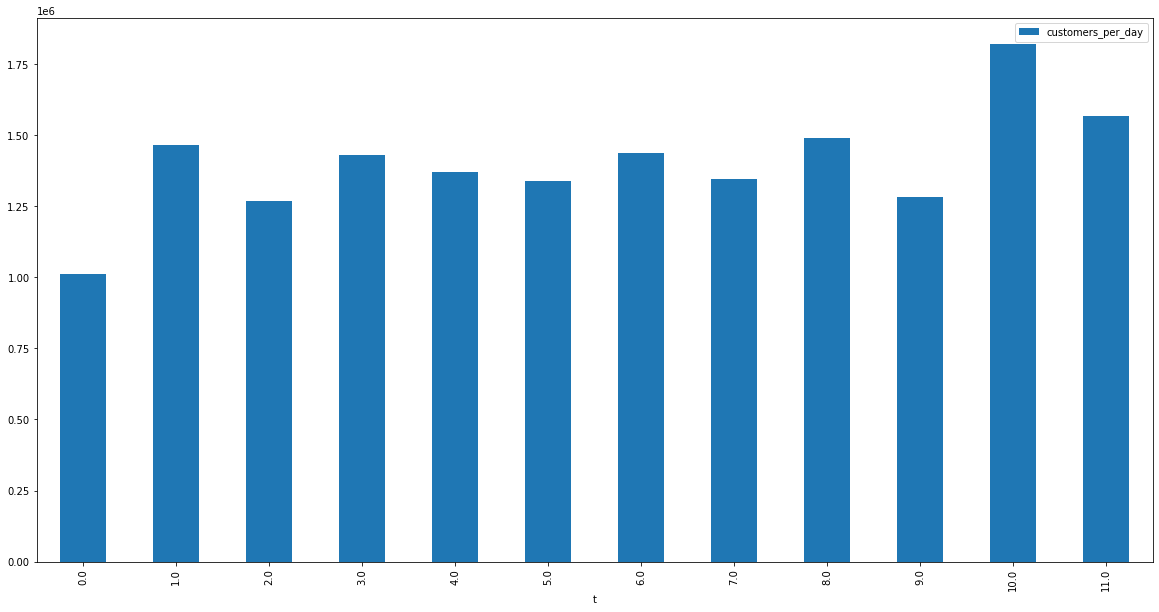

In [13]:
aggregated_sales.customers_per_day.groupby(aggregated_sales.index // 31).sum().plot(kind='bar', figsize=(20,10), legend=True)

In [14]:
# Analysis Step 4: Explore total daily sales by Store (reduced outlet list)

aggregated_sales_store = timed_data[(timed_data.outlet_id < 55)].groupby(by=['t', 'outlet_id']).sum()
aggregated_sales_store[['customers_per_day', 'sales_z']]

customers_per_day   sales_z
t     outlet_id                             
6.0   14.0                     0.0      0.00
      17.0                     0.0      0.00
      51.0                     0.0      0.00
      52.0                     0.0      0.00
8.0   14.0                   319.0  56216.66
...                            ...       ...
361.0 52.0                  1898.0  61276.92
362.0 14.0                  4159.0  84101.96
      17.0                  3577.0  82676.11
      51.0                  4028.0  85149.35
      52.0                  2791.0  76768.14

[1218 rows x 2 columns]

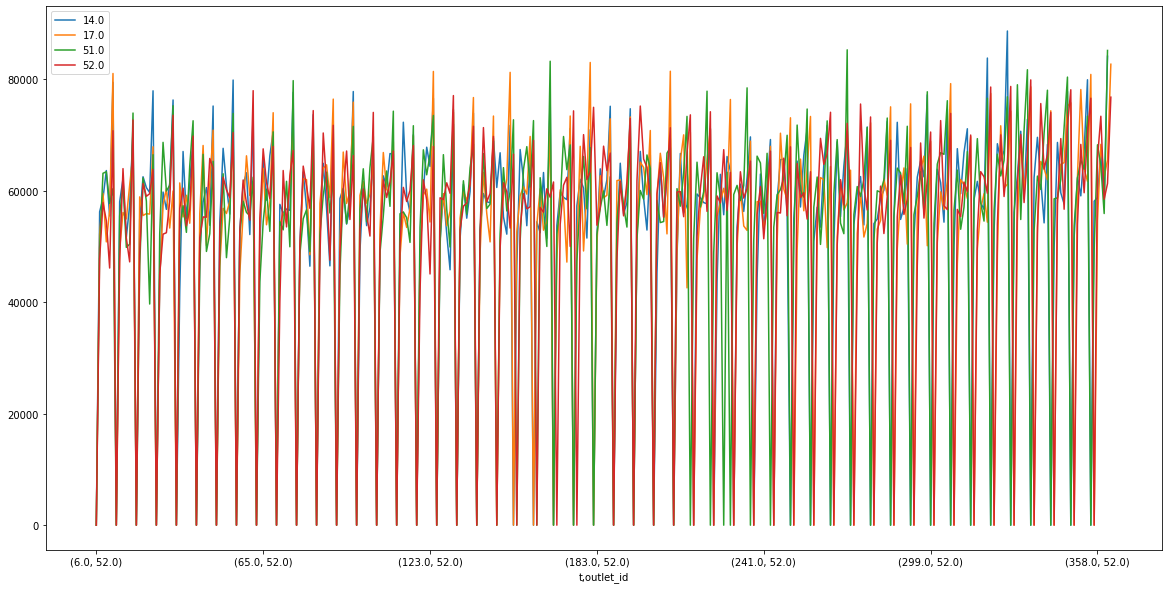

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
aggregated_sales_store.groupby('outlet_id').sales_z.plot(kind='line', figsize=(20,10), legend=True, ax=ax)
None

In [16]:
# Remove sundays to reduce noise in sales and customers count

timed_data_no_sunday = timed_data[timed_data.weekday < 6]

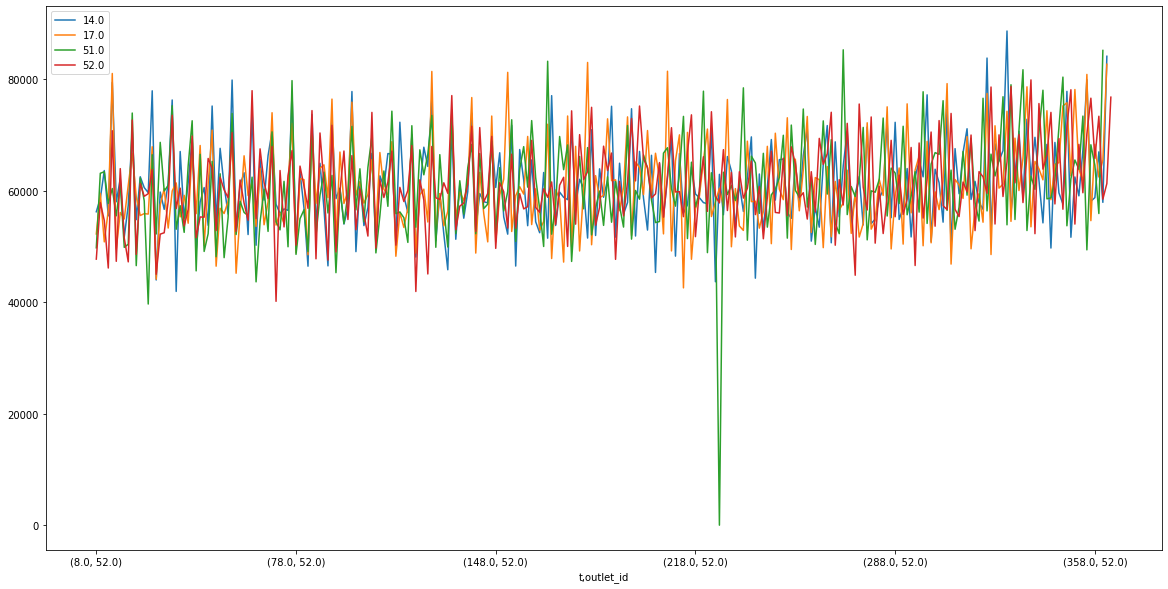

In [17]:
# Replot sales without sundays

aggregated_sales_store_ns = timed_data_no_sunday[(timed_data_no_sunday.outlet_id < 55)].groupby(by=['t', 'outlet_id']).sum()
aggregated_sales_store_ns[['customers_per_day', 'sales_z']]

fig, ax = plt.subplots(figsize=(8,6))
aggregated_sales_store_ns.groupby('outlet_id').sales_z.plot(kind='line', figsize=(20,10), legend=True, ax=ax)
None

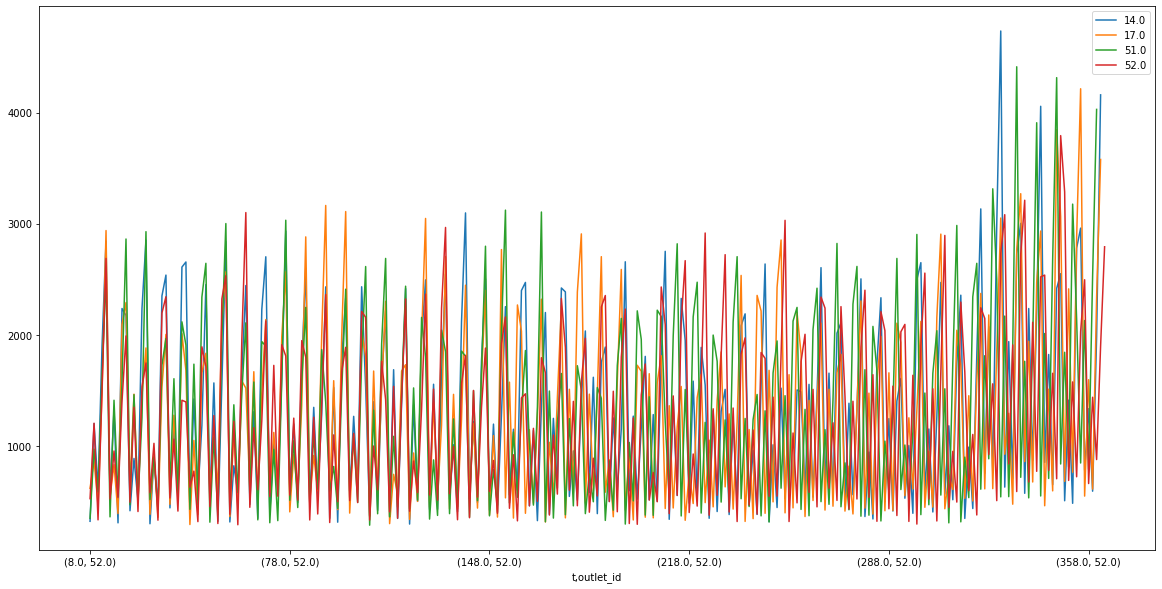

In [18]:
# Plot customers per day no Sundays

fig, ax = plt.subplots(figsize=(8,6))
aggregated_sales_store_ns.groupby('outlet_id').customers_per_day.plot(kind='line', figsize=(20,10), legend=True, ax=ax)
None

## Modelling
Choose a suitable model for predicting the sales_per_day and validating the prediction accuracy. Train and test the model.

In [19]:
daily_data = timed_data_no_sunday[['t', 'sales_z']].groupby('t').sum()
daily_data['sales_z'] = daily_data.sales_z / 1000000 # Downscaling data for easier metric reading
daily_data

sales_z
t              
8.0    2.723373
9.0    3.094189
10.0   2.951236
11.0   2.843826
12.0   3.619627
...         ...
358.0  2.844478
359.0  3.461975
360.0  3.083150
361.0  3.315301
362.0  3.991235

[255 rows x 1 columns]

<AxesSubplot:xlabel='t'>

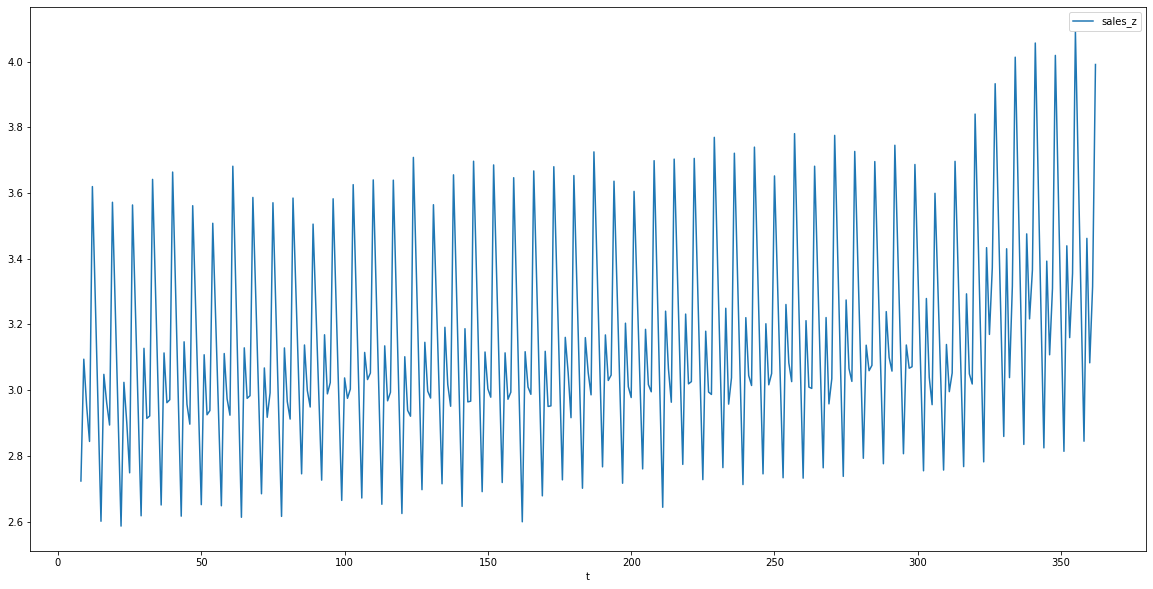

In [20]:
daily_data.plot(figsize=(20,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

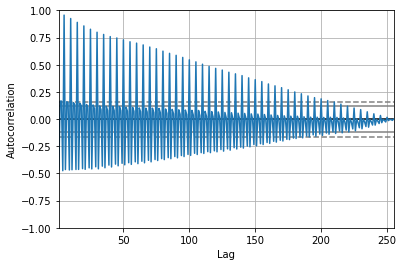

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(daily_data)

In [22]:
# Alternating correlation is clear but very 'spiky'. Could it be explained by sales registered after a weekend?
# Many factors are possible.

In [23]:
# Model parameters don't lead to convergence. Ignoring warning to avoid log-spam.
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model_d30 = ARIMA(daily_data, order=(30,1,0)) # 30 days regressive (although could be higher)
model_d30_fit = model_d30.fit()
print(model_d30_fit.summary())

c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationa

                               SARIMAX Results                                
Dep. Variable:                sales_z   No. Observations:                  255
Model:                ARIMA(30, 1, 0)   Log Likelihood                 324.854
Date:                Sun, 28 Feb 2021   AIC                           -587.709
Time:                        03:09:11   BIC                           -478.051
Sample:                             0   HQIC                          -543.595
                                - 255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2960      0.081     -3.663      0.000      -0.454      -0.138
ar.L2          0.0390      0.083      0.468      0.640      -0.124       0.202
ar.L3          0.1718      0.104      1.644      0.1

<AxesSubplot:xlabel='t'>

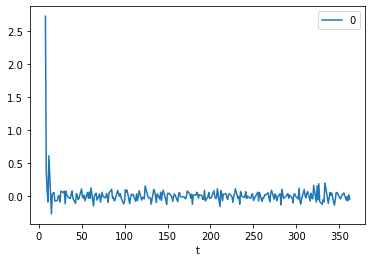

In [26]:
residuals = DataFrame(model_d30_fit.resid)
residuals.plot()

                0
count  255.000000
mean     0.014955
std      0.188041
min     -0.266670
25%     -0.039288
50%      0.002277
75%      0.042970
max      2.723373


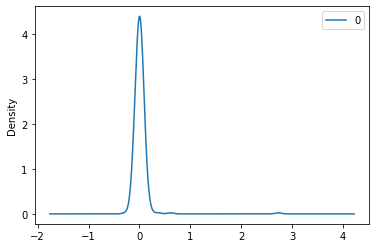

In [27]:
residuals.plot(kind='kde')
print(residuals.describe())

In [31]:
X = daily_data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(20,1,0)) # AR(20) - Difference(1) - MA(0) ---> Should use bigger AR but could be slow.
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3.017742, expected=3.014107
predicted=3.726419, expected=3.739691
predicted=2.729377, expected=2.745064
predicted=3.216786, expected=3.202085
predicted=2.991958, expected=3.016206
predicted=3.023942, expected=3.050474
predicted=3.730231, expected=3.652081
predicted=2.731690, expected=2.733261
predicted=3.235210, expected=3.260673
predicted=2.998772, expected=3.082983
predicted=3.031585, expected=3.025902
predicted=3.701863, expected=3.780810
predicted=2.729143, expected=2.731997
predicted=3.230811, expected=3.211407
predicted=3.037491, expected=3.009330
predicted=3.045694, expected=3.005138
predicted=3.718502, expected=3.681621
predicted=2.753346, expected=2.763594
predicted=3.228658, expected=3.220927
predicted=3.023573, expected=2.958172
predicted=3.007762, expected=3.034963
predicted=3.705193, expected=3.775432
predicted=2.724225, expected=2.737474
predicted=3.219584, expected=3.274443
predicted=3.019946, expected=3.065588
predicted=3.029228, expected=3.026637
predicted=3.

c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=3.097876, expected=3.316912
predicted=3.867816, expected=4.013489
predicted=2.889585, expected=2.834746
predicted=3.444477, expected=3.475637
predicted=3.176547, expected=3.216927
predicted=3.364585, expected=3.365489
predicted=4.031795, expected=4.056601
predicted=2.974502, expected=2.824271
predicted=3.452909, expected=3.392650
predicted=3.080485, expected=3.107636
predicted=3.300659, expected=3.309794
predicted=3.978867, expected=4.018919
predicted=2.852496, expected=2.813728
predicted=3.437535, expected=3.439308
predicted=3.162685, expected=3.159861
predicted=3.328290, expected=3.355302
predicted=4.011494, expected=4.090437
predicted=2.872864, expected=2.844478
predicted=3.460297, expected=3.461975
predicted=3.181181, expected=3.083150
predicted=3.310950, expected=3.315301
predicted=4.016977, expected=3.991235


Test MSE: 0.005
Test RMSE: 0.074


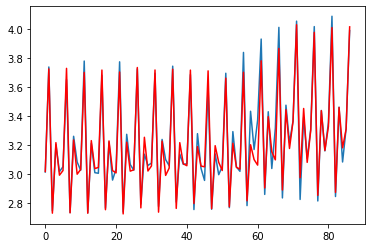

In [32]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [47]:
# Putting it in Production (The dummy way):

import statsmodels.api as sm
import pickle

with open('./model_d30.p', 'wb') as f:
    model_d30_fit.save(f)
    # Equivalent to: ---> pickle.dump(model_d30_fit, f)

with open('./model_d30.p', 'rb') as f:
    sm.load(f)
    # Equivalent to: ---> client_side_model = pickle.load(f)

In [48]:
# Must load all appropriate dependencies.
# Could be packaged together with a python application that loads this model accordingly or a dockerized solution.

client_side_model.forecast()

c:\users\saifa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


255    2.808001
dtype: float64

## Notes on Deploying on Production

*There are too many possible approaches of deploying on solutions, there is no best way*

### Considerations

1. Is the data sensitive? Are there anonymization requirements and Data Governance guidelines? (May impact practicality)
2. Are there Data Lineage requirements? (External policies and reporting)
3. Target framework or implementation, is it Cloud? Web-Based? Integrated? Micro-Serivce?
4. Who are the consumers? How technology agnostic must the solution be?
5. Must the deployment happen on Customer side? Or Server Side?

### Decisions based on Above Considerations

**Sensitive Data:** Model must be properly encrypted, coefficients and model content properly anonymized. May not be generic format, depending on point 5. Appropriate infrastructure for governance is in order (Filesystem security, backups, maintenance, user-access control)

**Data Lineage:** Model Feature Engineering, Training and Deployment should be clearly defined in a data workflow (Airflow, NiFi, Ansible, etc)

**Target Framework:** If deploying on a big data architecture, Apache Spark ML Pipelines may serve purpose of model formatting. Cloud Based frameworks should use built-in solutions (AWS SageMaker for example).  Kubernetes should be considered for Micro Services and Contentainer solutions.

**Who are the consumers:** Agnostic solutions should be wrapped in appropriate standards like REST services or any type of network standards (Soap, RPC, websockets, etc) that hide implementation behind. Where in house solutions should consider the target environment to provide the appropriate format.

**Where is the solution applied:** Local infrastructure provider allows for in house solution architectures and higher flexibility. A Tensorflow trained graph may not be the right solution for a customer implementation, where a Dockerized solution could solve the problem.

## Business Problem
What other retail data could be relevant to predict the sales_per_day? Give at least 5 different examples and explain in 2-3 sentences why they could be interesting to add to the model.

### Micro variables (Short-Term)
* Binary variables for special discount days or holidays:

Binary flagged variables could help prediction models identify special occasions where likelihood of bigger sales is overall-likely, when a special day is scheduled (black friday, christmas, etc). They also help reducing residual errors from "outliers"

* Average amount invested in sales/marketing in past month: 

Easily quantifiable investments variable could help improve prediction in polynomial models, based on the amount invested in sales, marketing, new advertising, new launches or special offers already scheduled

* Recent opening of new stores or new sales politics or selling channels:

Number of retail stores at a given time or number of active selling channels and mediums of payments, can help prediction models improve their accuracy, by helping the model explain spikes due to more overall count of stores, etc.

### Macro variables (Mid-Term)
* Correlation with GDP, Interest Rates (credit), Inflation and Unemployment rate:

Macroeconomic variables tend to explain overall impact in sales. However, this can become a chicken-egg problem if not modelled properly.

* Prices and comparative currency advantages (variations in relative currency value):

Variability in currency rates across retail countries can help explain a boost/deterioration of sales when exporting/importing impacts prices directly. Any price multiplier can help improve scaling the model appropriately.

* Customs policies for import/exports and competition (need quantifiable multiplier):

Although hard to quantify, any measure of competition and customs policies can help predict sales, if these policies can be known in advance.

# Architecture 

Now pretend you need to build a system which runs the model and should be able to make realtime predictions of the sales per day, everytime new data is generated by the source systems.  
You need to design (a) data pipeline(s) which transfers the data from either the sourcesystems or BigQuery to the prediction engine in the format the model/prediction engine can handle it. 

There are the following preconditions: 
    
    - There are 3 source systems: 
        - System A: System which handles __sales_per_day__ --> API Connector (Real-Time possible)
        - System B: Delivers customers_per_day --> Flat File on SFTP Server once per Day per batch
        - System C: Stores brand, country, currency and outled_id --> BigQuery    
        - You want to enable realtime predictions
    
    - You can use any component you like and would use for that use case. Please add to each logical component for your architecture a respective tool or GCP service. (e.g. for the logical component ETL a tool named Google Dataflow)

Please describe how your architecure would look like with an architecture picture. Describe how the different components will be connected and communicate. Please elaborate why you have choosen a certain logical component + tooling. We expect a moderate level of details within the architecture 

![Arch Proposal](./Architecture_proposal.jpg)

# Send it to us
In the end, please send us: 
    - The ipython notebook 
    - An detailed description of your architecture + an architecture picture (PDF). 